# 10ML/ML1.py

## Feature Engineering

- One of the more important steps in using machine learning in practice is feature engineering—that is, taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix

### Categorical features

In [1]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

**One-hot encoding:** extra columns indicating the presence or absence of a category with a value of 1 or 0

In [2]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data) #notice it is in alphabetical order

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

In [3]:
vec.get_feature_names()

C:\Users\melihcanyardi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

- If your category has many possible values, this can greatly increase the size of your dataset. However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution

In [4]:
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

## Text features
### Word counts

In [5]:
sample = ['problem of evil',
'evil queen',
'horizon problem']
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [6]:
import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


**Down-weighting frequent words:** term frequency–inverse document frequency (TF–IDF), which weights the word counts by a measure of how often they appear in the documents

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


- If interested in image feature extraction, see SciKit-Image project

**Derived features:** transforming input - basis function regression

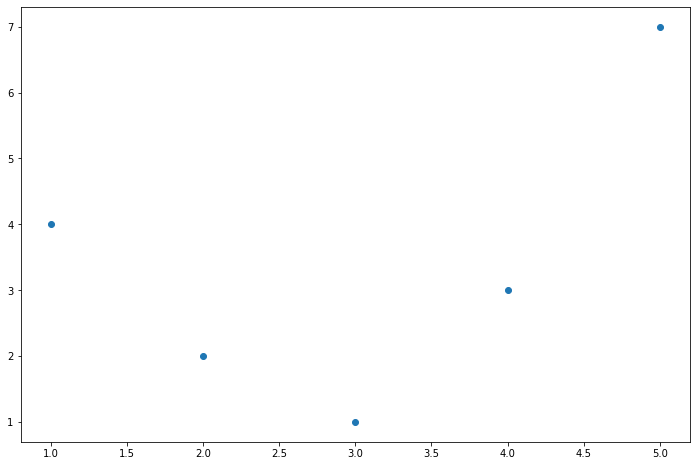

In [8]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.figure(figsize=(12, 8))
plt.scatter(x, y);

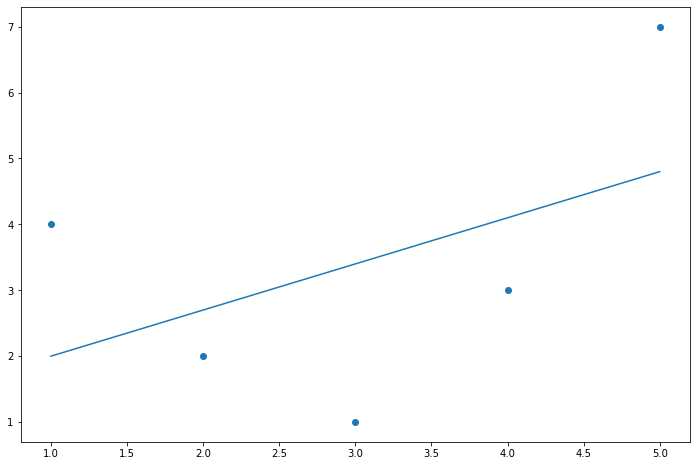

In [9]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.plot(x, yfit);

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


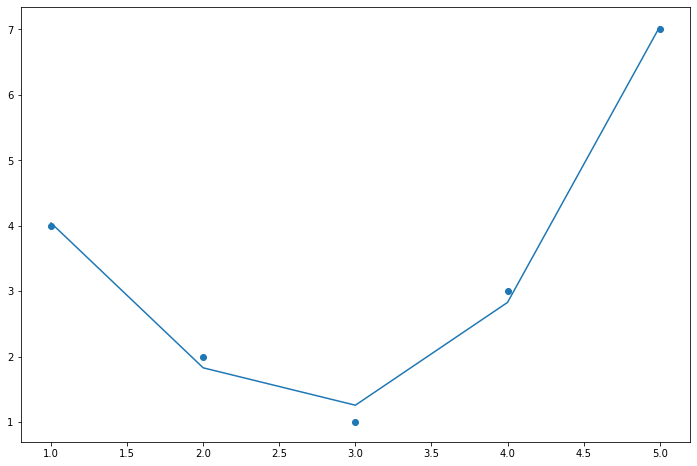

In [11]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.plot(x, yfit);

#### TODO: Do the same as above, fitting a polynomial to your data, but use this PolynomialFeatures method instead

## Imputation of missing data

In [12]:
from numpy import nan
X = np.array([[ nan, 0, 3],
[ 3, 7, 9],
[ 3, 5, 2],
[ 4, nan, 6],
[ 8, 8, 1]])
y = np.array([14, 16, -1, 8, -5])

- Simply use the mean (also can use median or most_frequent value)

In [13]:
from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

In [14]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

- If missingness is problematic, consider MICE

#### TODO: Fill in missing values in your data using different methods, and see if your substantive results change when modeling

## Feature pipelines
- Suppose we want to:
    - 1. Impute missing values using the mean
    - 2. Transform features to quadratic
    - 3. Fit a linear regression

In [15]:
from sklearn.pipeline import make_pipeline
model = make_pipeline(SimpleImputer(strategy='mean'),
    PolynomialFeatures(degree=2),
    LinearRegression())

model.fit(X, y) # X with missing values, from above
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


# 10ML/ML2.py

## Naive Bayes classification

- Fast and simple classification algorithm
- P(L|features) = P(features|L)P(L)/P(features)
    - P(L1|features)/P(L2|features) = P(features|L1)P(L1)/[P(features|L2)P(L2)]
- **Generative model:** specifies the hypothetical random process that generates data

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

### Gaussian naive Bayes
- Data from each label is drawn from simple Gaussian distribution

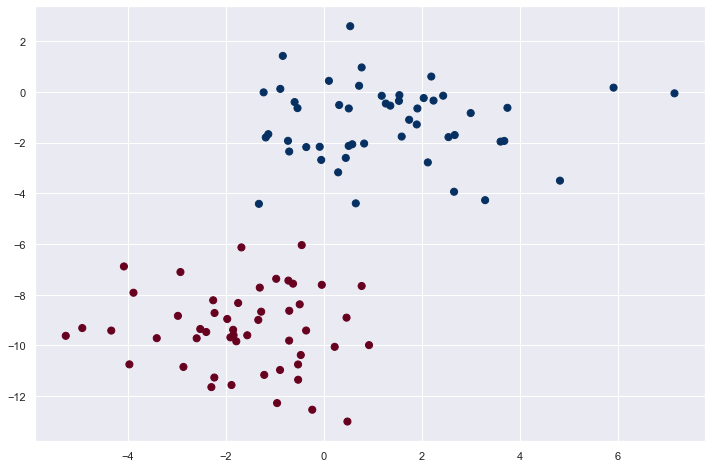

In [17]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

- Find mean and standard deviation of points within a label, which defines the distribution
- Can then compute posterior ratio for given point

In [18]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [19]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

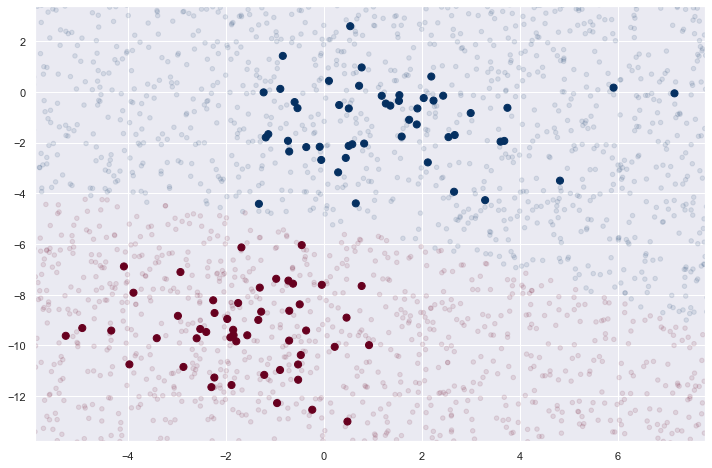

In [20]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

- In general, boundary in Gaussian naive Bayes is quadratic
- Allows for probabilistic classification

In [21]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## Multinomial naive Bayes
- Features assumed to be generated from simple multinomial distribution (prob of observing counts among a number of categories - most useful when features that represent counts or rates)

In [22]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

- Select a few categories for simplicity

In [23]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space',
'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



### TF-IDF vectorizer

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

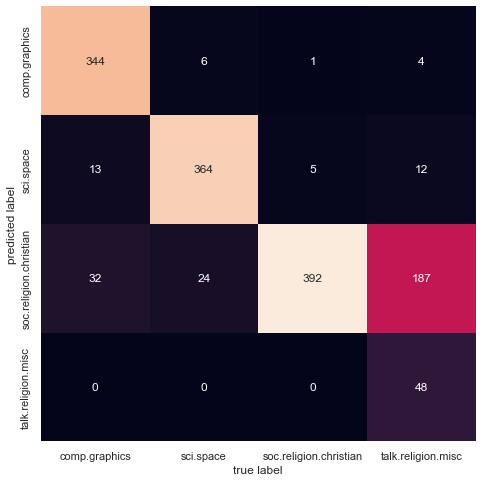

In [25]:
#create a pipeline
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

#fit the model and predict
model.fit(train.data, train.target)
labels = model.predict(test.data)

#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
plt.figure(figsize=(12, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [26]:
#prediction for a single string

def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

predict_category('sending a payload to the ISS')

'sci.space'

In [27]:
predict_category('discussing islam vs atheism')

'soc.religion.christian'

In [28]:
predict_category('determining the screen resolution')

'comp.graphics'

- naive Bayes is usually out-performed by more complicated models, but
    - They are extremely fast for both training and prediction
    - They provide straightforward probabilistic prediction
    - They are often very easily interpretable
    - They have very few (if any) tunable parameters
- Works well when:
    - When the naive assumptions actually match the data (very rare in practice)
    - For very well-separated categories, when model complexity is less important
    - For very high-dimensional data, when model complexity is less important

## Linear regression
- Good starting point for regression tasks

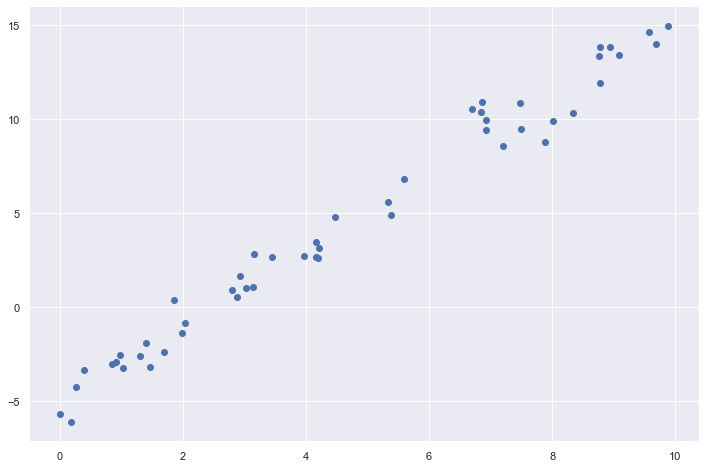

In [29]:
import numpy as np

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.figure(figsize=(12, 8))
plt.scatter(x, y);

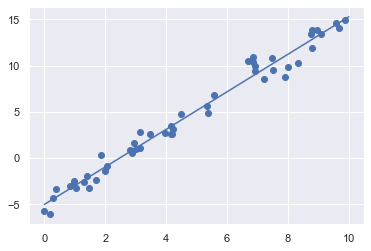

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])
plt.scatter(x, y)
plt.plot(xfit, yfit);

In [31]:
print("Model slope:", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope: 2.027208810360695
Model intercept: -4.998577085553202


### Multidimensional

In [32]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])
model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000064
[ 1.5 -2.   1. ]


## Basis functions
- Transform the data through a function

### Polynomial basis functions

In [33]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

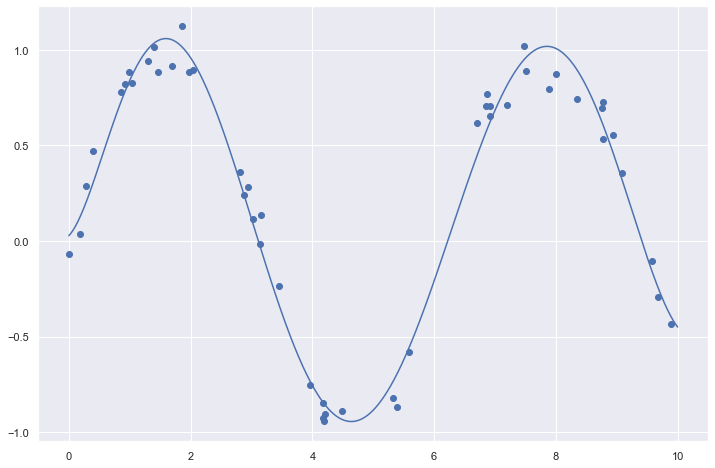

In [34]:
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
LinearRegression())

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)
poly_model.fit(x[:, np.newaxis], y)
yfit = poly_model.predict(xfit[:, np.newaxis])
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Gaussian basis functions

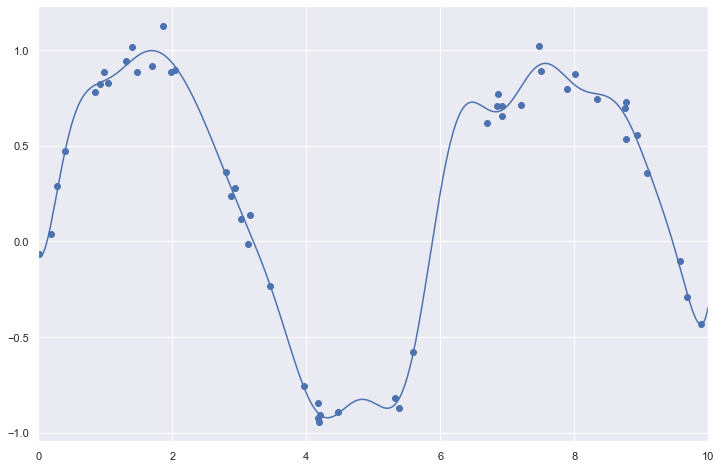

In [35]:
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor

    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))

    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor *  (self.centers_[1] - self.centers_[0])
        return self

    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_, self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20), LinearRegression())
gauss_model.fit(x[:, np.newaxis], y)
yfit = gauss_model.predict(xfit[:, np.newaxis])
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

## Regularization
- If use too many basis functions leads to overfitting

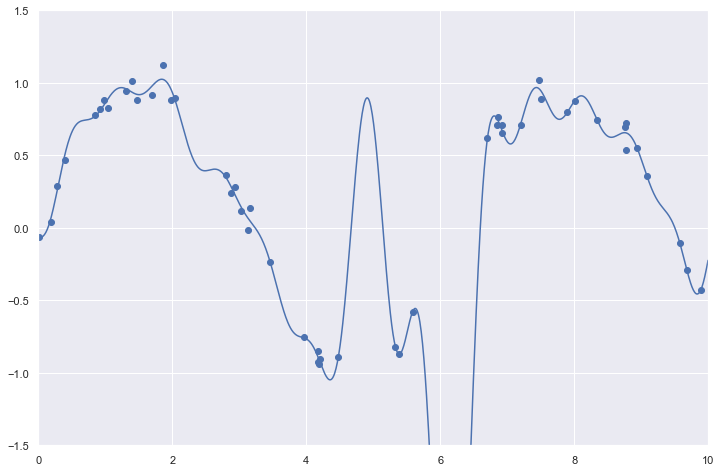

In [36]:
model = make_pipeline(GaussianFeatures(30),
LinearRegression())
model.fit(x[:, np.newaxis], y)
plt.figure(figsize=(12, 8))
plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, np.newaxis]))
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

- Plot the coefficients of Gaussian bases with respect to their location

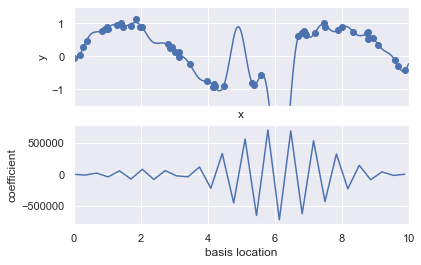

In [37]:
def basis_plot(model, title=None):
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

- This is typical overfitting behavior when basis functions overlap: the coefficients of adjacent basis functions blow up and cancel each other out. We know that such behavior is problematic, and it would be nice if we could limit such spikes explicitly in the model by penalizing large values of the model parameters. Such a penalty is known as regularization, and comes in several forms.

## Ridge regression (L2 regularization)
- Penalizing sum of squares of model coefficients
- $\text{P} = \alpha\sum{\theta^2_n}$
- where α is a free parameter that controls the strength of the penalty

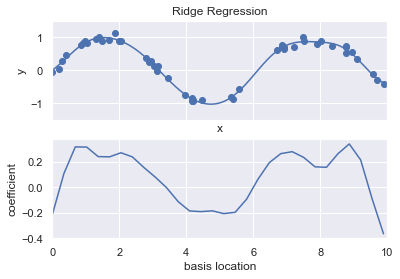

In [38]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title='Ridge Regression')

- As alpha goes to zero, recover standard linear regression, as it goes to infinity, all model responses will be suppressed
- Ridge regression is very efficient computationally

## Lasso regularization (L1)
- $\text{P} = \alpha\sum|\theta_n|$
- Due to geometric reasons lasso regression tends to favor sparse models where possible; that is, it preferentially sets model coefficients to exactly zero

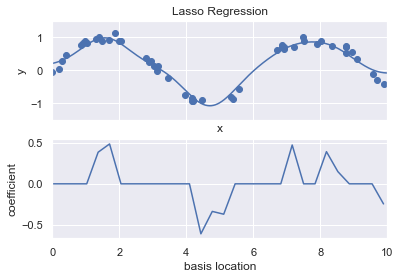

In [39]:
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30), Lasso(alpha=0.01))
basis_plot(model, title='Lasso Regression')

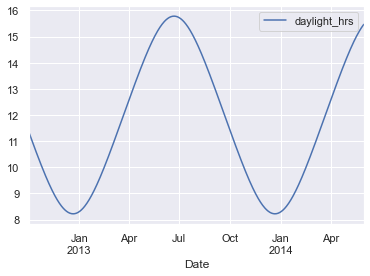

In [40]:
import pandas as pd
#read in data
counts = pd.read_csv('../KocPythonFall2021/inclass/10ML/FremontHourly.csv', index_col='Date', parse_dates=True)
weather = pd.read_csv('../KocPythonFall2021/inclass/10ML/SeaTacWeather.csv', index_col='DATE', parse_dates=True)

#get totals in day
daily = counts.resample('d').sum()
daily['Total'] = daily.sum(axis=1)
daily = daily[['Total']] # remove other columns
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
for i in range(7):
    daily[days[i]] = (daily.index.dayofweek == i).astype(float)
    
#include holidays
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays('2012', '2016')
daily = daily.join(pd.Series(1, index=holidays, name='holiday'))
daily['holiday'].fillna(0, inplace=True)

#hours of daylight
def hours_of_daylight(date, axis=23.44, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    days = (date - pd.datetime(2000, 12, 21)).days
    m = (1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(days * 2 * np.pi / 365.25)))
    return 24. * np.degrees(np.arccos(1 - np.clip(m, 0, 2))) / 180.

#plot sunlight
daily['daylight_hrs'] = list(map(hours_of_daylight, daily.index))
daily[['daylight_hrs']].plot();

In [41]:
# temperatures are in 1/10 deg C; convert to C
weather['TMIN'] /= 10
weather['TMAX'] /= 10
weather['Temp (C)'] = 0.5 * (weather['TMIN'] + weather['TMAX'])

# precip is in 1/10 mm; convert to inches
weather['PRCP'] /= 254
weather['dry day'] = (weather['PRCP'] == 0).astype(int)
daily = daily.join(weather[['PRCP', 'Temp (C)', 'dry day']])

daily['annual'] = (daily.index - daily.index[0]).days / 365.

daily.head()

,Total,Mon,Tue,Wed,Thu,Fri,Sat,Sun,holiday,daylight_hrs,PRCP,Temp (C),dry day,annual
Date,,,,,,,,,,,,,,
2012-10-02,1938.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.335681,0.0,13.90,1,0.000000
2012-10-03,3521.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,11.277359,0.0,13.35,1,0.002740
2012-10-04,3475.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,11.219142,0.0,13.60,1,0.005479
2012-10-05,3148.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,11.161038,0.0,15.30,1,0.008219
2012-10-06,2006.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,11.103056,0.0,15.85,1,0.010959


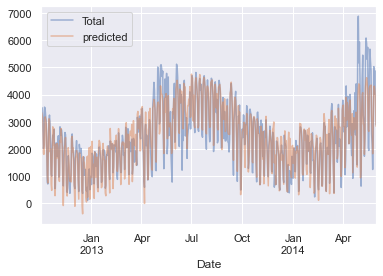

In [42]:
#linear regression
column_names = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'holiday',
'daylight_hrs', 'PRCP', 'dry day', 'Temp (C)', 'annual']
X = daily[column_names]
y = daily['Total']
model = LinearRegression(fit_intercept=False) #why do we set intercept to false?
model.fit(X, y)
daily['predicted'] = model.predict(X)

daily[['Total', 'predicted']].plot(alpha=0.5);

In [43]:
#how much does each feature contribute?
params = pd.Series(model.coef_, index=X.columns)
params

Mon              265.779104
Tue              306.551668
Wed              359.247220
Thu              199.486334
Fri              -93.133822
Sat            -1276.752727
Sun            -1308.178141
holiday        -1190.062935
daylight_hrs     137.183312
PRCP            -662.551672
dry day          558.729470
Temp (C)          64.596364
annual           210.767214
dtype: float64

In [44]:
#measure uncertainty through bootstrap
from sklearn.utils import resample
np.random.seed(1)
err = np.std([model.fit(*resample(X, y)).coef_ for i in range(1000)], 0)

print(pd.DataFrame({'effect': params.round(0), 'error': err.round(0)}))

              effect  error
Mon            266.0  128.0
Tue            307.0  128.0
Wed            359.0  124.0
Thu            199.0  127.0
Fri            -93.0  115.0
Sat          -1277.0  128.0
Sun          -1308.0  129.0
holiday      -1190.0  196.0
daylight_hrs   137.0   14.0
PRCP          -663.0   70.0
dry day        559.0   44.0
Temp (C)        65.0    5.0
annual         211.0   47.0


- Our model is almost certainly missing some relevant information. For example, non‐linear effects (such as effects of precipitation and cold temperature) and nonlinear trends within each variable (such as disinclination to ride at very cold and very hot temperatures) cannot be accounted for in this model. Additionally, we have thrown away some of the finer-grained information (such as the difference between a rainy morning and a rainy afternoon), and we have ignored correlations between days (such as the possible effect of a rainy Tuesday on Wednesday’s numbers, or the effect of an unexpected sunny day after a streak of rainy days)

## Support vector machines (SVMs)
- Both classification and regression

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# use Seaborn plotting defaults
import seaborn as sns; sns.set()

### Discriminative classification
- Rather than modeling each class, we simply find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other

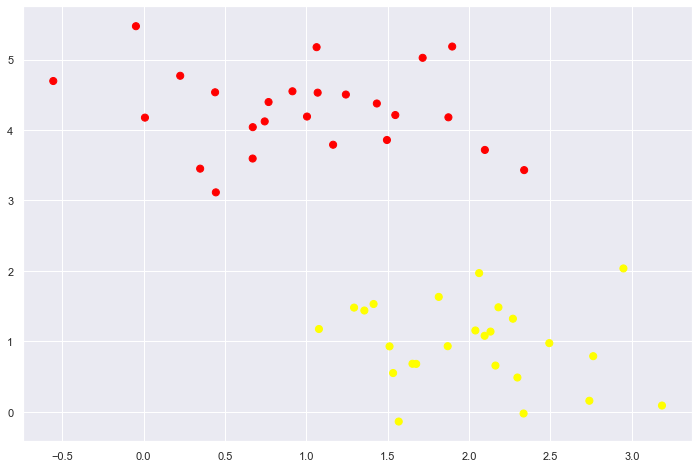

In [46]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
random_state=0, cluster_std=0.60)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

- Multiple lines can discriminate

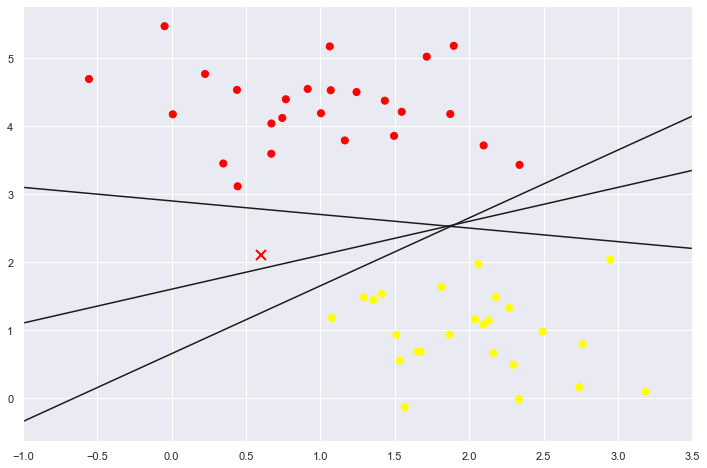

In [47]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10) #one marked x will vary in prediction based on line choice
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

- Rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point

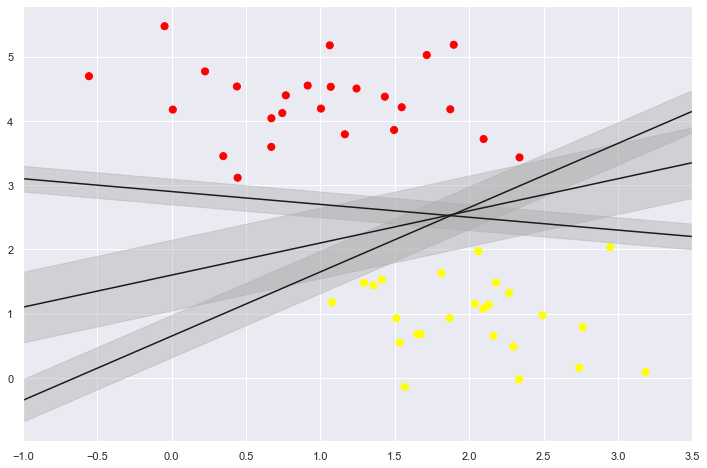

In [48]:
xfit = np.linspace(-1, 3.5)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
    
plt.xlim(-1, 3.5);

- In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator

In [49]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

- To better visualize what’s happening here, let’s create a quick convenience function that will plot SVM decision boundaries for us

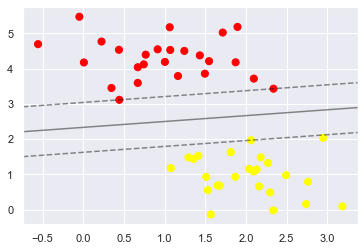

In [50]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a two-dimensional SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model);

- Points touching line are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name

In [51]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

- Notice that these points define the model, and new points will not necessarily change it

### Beyond linear boundaries: Kernel SVM

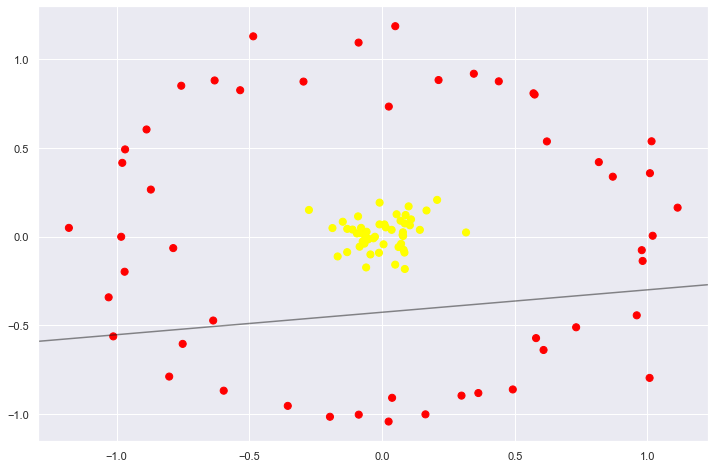

In [52]:
from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)
clf = SVC(kernel='linear').fit(X, y)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

### Radial basis function

In [53]:
r = np.exp(-(X ** 2).sum(1)) #makes data trivially linear

- One strategy to this end is to compute a basis function centered at every point in the dataset, and let the SVM algorithm sift through the results. This type of basis function transformation is known as a **kernel transformation**, as it is based on a similarity relationship (or kernel) between each pair of points


- **Kernel trick**, a fit on kernel-transformed data can be done implicitly-that is, without ever building the full N - dimensional representation of the kernel projection

In [54]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

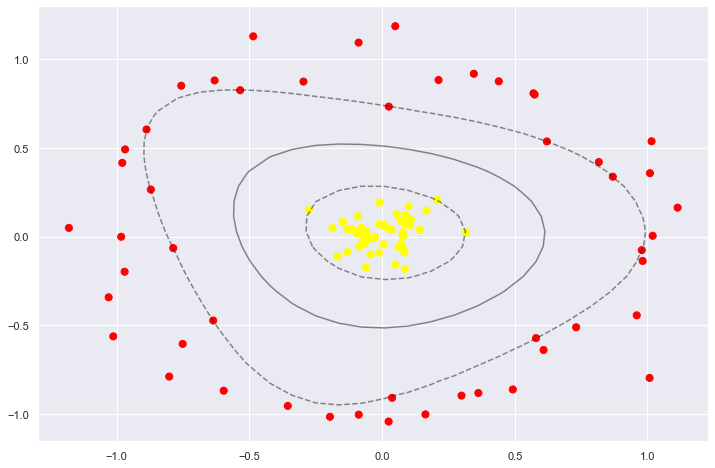

In [55]:
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
s=300, lw=1, facecolors='none');

### Tuning the SVM: Softening margins
- Messy data

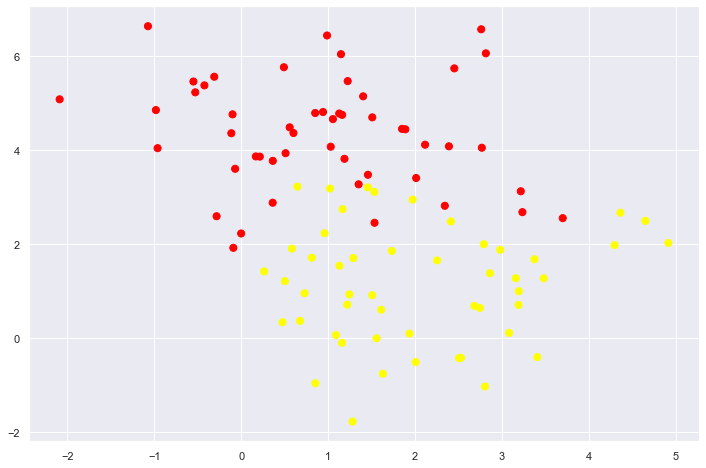

In [56]:
X, y = make_blobs(n_samples=100, centers=2,
random_state=0, cluster_std=1.2)
plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

- **The hardness of the margin** is controlled by a tuning parameter, most often known as **C**. For very large C , the margin is hard, and points cannot lie in it. For smaller C , the margin is softer, and can grow to encompass some points.

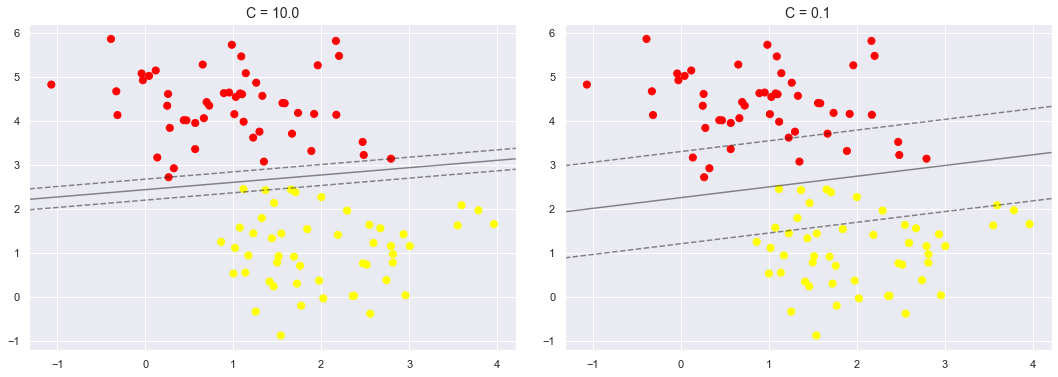

In [57]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50,   cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

- Optimum value of C needs to be tuned through cross-validation

### Example: Face Detection

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


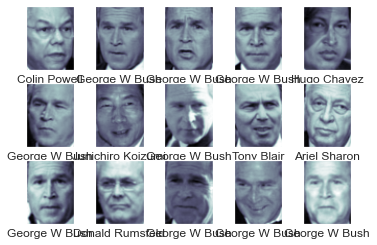

In [58]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

- Use PCA to lower the dimensionality

In [59]:
#use PCA to lower the dimensionality
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, random_state=42, svd_solver = 'randomized')
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

#split the data
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

#grid search - CV to emplore parameters C (margin of hardness) and gamma (size of radial basis function kernel)
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50], 'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

#run the search and time it
%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 16.4 s
{'svc__C': 10, 'svc__gamma': 0.001}


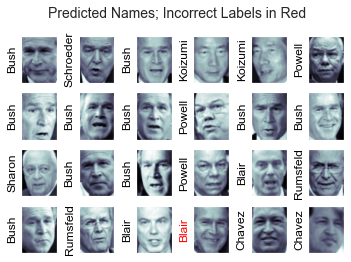

In [60]:
#predict
model = grid.best_estimator_
yfit = model.predict(Xtest)

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
    color='black' if yfit[i] == ytest[i] else 'red')
    
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [61]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



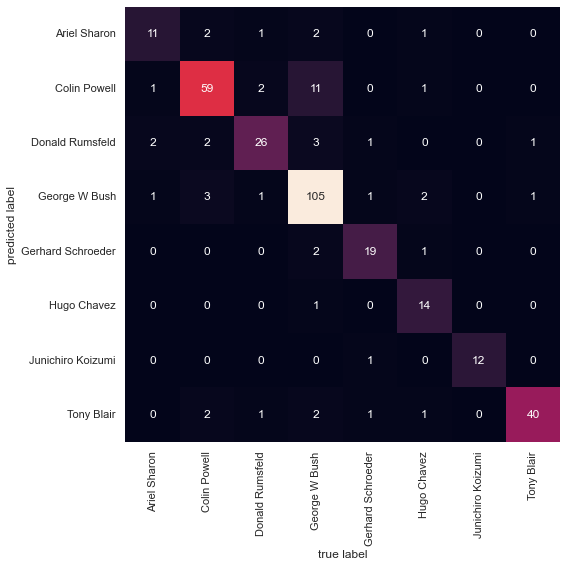

In [62]:
#confusion matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
plt.figure(figsize=(12, 8))
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

- These methods are a powerful classification method for a number of reasons:
    - Their dependence on relatively few support vectors means that they are very compact models, and take up very little memory.
    - Once the model is trained, the prediction phase is very fast.
    - Because they are affected only by points near the margin, they work well with high-dimensional data—even data with more dimensions than samples, which is a challenging regime for other algorithms.
    - Their integration with kernel methods makes them very versatile, able to adapt to many types of data.


- However, SVMs have several disadvantages as well:
    - The scaling with the number of samples N is 0 N 3 at worst, or 0 N 2 for efficient implementations. For large numbers of training samples, this computational cost can be prohibitive.
    - The results are strongly dependent on a suitable choice for the softening parameter C . This must be carefully chosen via cross-validation, which can be expensive as datasets grow in size.
    - The results do not have a direct probabilistic interpretation. This can be estimated via an internal cross-validation (see the probability parameter of SVC ), but this extra estimation is costly.